#### Rum Yue
#%%HTML

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

## Season 2008 - 2016
### Intermediate Data Visualization
#### Part I  Data Preparation

In [2]:
db = 'database.sqlite'
conn = sqlite3.connect(db)

In [3]:
ct = pd.read_sql_query("select * from Country", conn)
lg = pd.read_sql_query("select * from League", conn)
mtc = pd.read_sql_query("select * from Match", conn)
pl = pd.read_sql_query("select * from Player", conn)
pl_a = pd.read_sql_query("select * from Player_Attributes", conn)
seq = pd.read_sql_query("select * from sqlite_sequence", conn)
tm = pd.read_sql_query("select * from Team", conn)
tm_a = pd.read_sql_query("select * from Team_Attributes", conn)

we also plug in the geo coordinates data to match countries

In [4]:
lalo = pd.read_excel("fcll.xlsx", sheet_name="Sheet1")

In [5]:
lalo.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


Now we start with the merge of country and league data

And then combine with matches data

In [6]:
ct = ct.copy()
lg = lg.copy()

In [7]:
ct_lg = ct.merge(lg, left_on = 'id', right_on = 'id', how = 'outer')
ct_lg.head()

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


In [8]:
ct_lg.drop(['id'], axis = 1, inplace = True)

In [9]:
ct_lg = ct_lg.rename(columns = {'name_x': 'country', 'name_y': 'league'})

In [10]:
mtc = mtc.copy()
mtc.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
mtcnew = mtc[['country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

In [12]:
mtcnew['country_id'].unique()

array([    1,  1729,  4769,  7809, 10257, 13274, 15722, 17642, 19694,
       21518, 24558])

In [13]:
mdata = mtcnew.merge(ct_lg, left_on = 'country_id', right_on = 'country_id', how = 'outer')

In [14]:
# mdata.nunique()
mdata.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [15]:
mdata.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


Plug in geographical info

In [16]:
ct_info = ct_lg.merge(lalo, left_on = 'country', right_on = 'name', how = 'left')
# why we do this?
# we merge columns by identical rows of 'country' in ct_lg and 'name' in lalo ---- 1 to 1 mapping to delete redundent rows

In [17]:
ct_info.head()

,country_x,country_id,league,country_y,latitude,longitude,name
0,Belgium,1,Belgium Jupiler League,BE,50.503887,4.469936,Belgium
1,England,1729,England Premier League,e,51.752000,1.257700,England
2,France,4769,France Ligue 1,FR,46.227638,2.213749,France
3,Germany,7809,Germany 1. Bundesliga,DE,51.165691,10.451526,Germany
4,Italy,10257,Italy Serie A,IT,41.871940,12.567380,Italy


In [18]:
ct_info.drop(['country_id', 'country_y', 'name'], axis = 1, inplace = True)
ct_info = ct_info.rename(columns = {'country_x': 'country'})

In [19]:
ct_info['country'].unique()

array(['Belgium', 'England', 'France', 'Germany', 'Italy', 'Netherlands',
       'Poland', 'Portugal', 'Scotland', 'Spain', 'Switzerland'],
      dtype=object)

In [20]:
import os
import conda

In [21]:
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = '/anaconda3/share/proj'

In [22]:
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


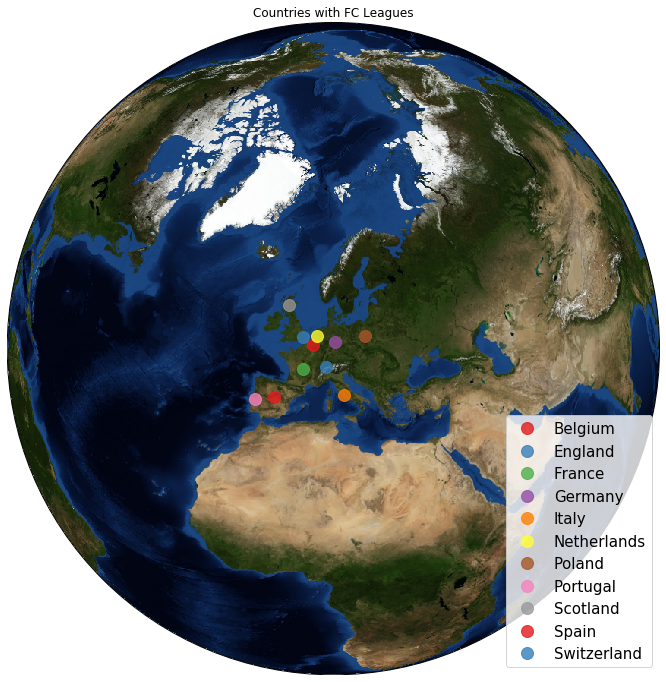

In [25]:
me = Basemap(projection = 'ortho', resolution = None, lat_0 = 50, lon_0 = 10, urcrnrlat = 80, llcrnrlat = -80)
plt.figure(figsize = (12, 12))
countr = list(ct_info['country'].unique())
c = sns.color_palette('Set1', n_colors = 11)
label = countr

def plfc(countr, c, label):
    lat = list(ct_info[ct_info['country'] == countr].latitude)
    lng = list(ct_info[ct_info['country'] == countr].longitude)
    x, y = me(lng, lat)
    me.plot(x, y, 'go', markersize = 12, color = j, alpha = 0.8, label = i)
    
for i, j in zip(countr, c):
    plfc(i, j, i)
    
me.bluemarble(scale = 0.5)
plt.legend(loc = 4, frameon = True, prop = {'size': 15}).get_frame().set_facecolor('white')
plt.title('Countries with FC Leagues')
plt.show()

In [26]:
import itertools

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


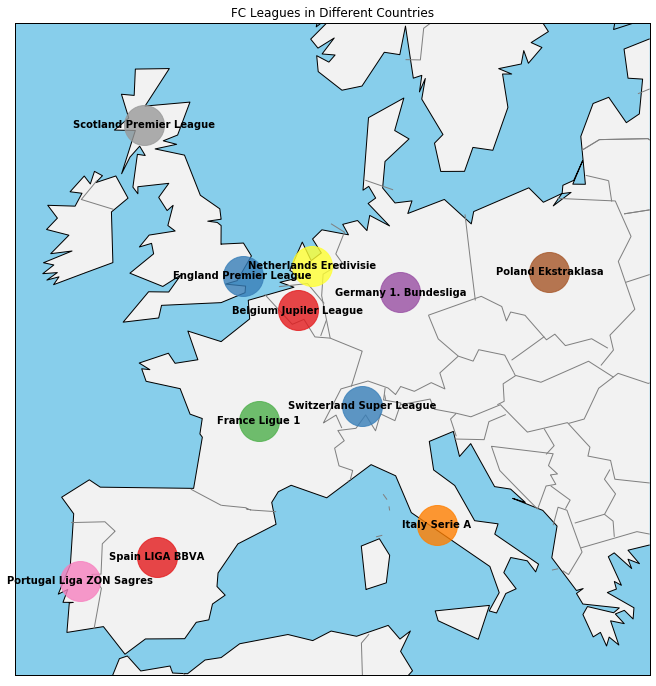

In [30]:
mc = Basemap(projection = 'merc', llcrnrlat = 35, urcrnrlat = 60, llcrnrlon = -12, urcrnrlon = 25, lat_ts = 20, lat_0 = True, lon_0 = True)

plt.figure(figsize = (15, 12))

mc.drawmapboundary(fill_color = 'skyblue', color = 'k', linewidth = 1)
mc.drawcoastlines(linewidth = 1)
mc.drawcountries(linewidth = 1, color = 'grey')
mc.fillcontinents(color = '#f2f2f2', alpha = 1, lake_color = 'b')

leag = list(ct_info['league'].unique())
c = sns.color_palette('Set1', 11)
lat = list(ct_info[ct_info['league'] == leag].latitude)
lng = list(ct_info[ct_info['league'] == leag].longitude)
x, y  = mc(lng, lat) 

def pleu(leag, c):
    lat = list(ct_info[ct_info['league'] == leag].latitude)
    lng = list(ct_info[ct_info['league'] == leag].longitude)
    x, y = mc(lng, lat)
    mc.plot(x, y, 'go', markersize = 40, color = j, alpha = 0.8, linewidth = 20)
    
for i, j in zip(leag, c):
    pleu(i, j)
        
for i, j, k in itertools.zip_longest(x, y, ct_info['league']):
    plt.text(i, j, k, fontsize = 10, color = 'k', horizontalalignment = 'center', verticalalignment = 'center', weight='bold')

plt.title('FC Leagues in Different Countries')
plt.show()

### TO BE CONTINUED